In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,Age,Workclass,FinalWeight,Education,EducationNo,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.describe()

,Age,FinalWeight,EducationNo,CapitalGain,CapitalLoss,HoursPerWeek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            32561 non-null  int64 
 1   Workclass      32561 non-null  object
 2   FinalWeight    32561 non-null  int64 
 3   Education      32561 non-null  object
 4   EducationNo    32561 non-null  int64 
 5   MaritalStatus  32561 non-null  object
 6   Occupation     32561 non-null  object
 7   Relationship   32561 non-null  object
 8   Race           32561 non-null  object
 9   Sex            32561 non-null  object
 10  CapitalGain    32561 non-null  int64 
 11  CapitalLoss    32561 non-null  int64 
 12  HoursPerWeek   32561 non-null  int64 
 13  NativeCountry  32561 non-null  object
 14  Income         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df['Income'].value_counts()

<=50K    24720
>50K      7841
Name: Income, dtype: int64

In [7]:
df['Sex'].value_counts()

Male      21790
Female    10771
Name: Sex, dtype: int64

In [8]:
df['NativeCountry'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [9]:
df['Workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [10]:
df['Occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: Occupation, dtype: int64

In [11]:
# Dropping Education- Education No. is enough, Final Weight- Highly Discrete Data so not useful

In [12]:
df = df.drop(['Education', 'FinalWeight'], axis = 1)
df.head(1)

,Age,Workclass,EducationNo,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,90,?,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K


In [13]:
# Replacing NaN with Forward Fill

In [14]:
df.fillna(method = 'ffill', inplace = True)

In [15]:
# Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Workclass'] = le.fit_transform(df['Workclass'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Relationship'] = le.fit_transform(df['Relationship'])
df['Race'] = le.fit_transform(df['Race'])
df['Sex'] = le.fit_transform(df['Sex'])
df['NativeCountry'] = le.fit_transform(df['NativeCountry'])
df['Income'] = le.fit_transform(df['Income'])

df.head()

,Age,Workclass,EducationNo,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,90,0,9,6,0,1,4,0,0,4356,40,39,0
1,82,4,9,6,4,1,4,0,0,4356,18,39,0
2,66,0,10,6,0,4,2,0,0,4356,40,39,0
3,54,4,4,0,7,4,4,0,0,3900,40,39,0
4,41,4,10,5,10,3,4,0,0,3900,40,39,0


<AxesSubplot:xlabel='Income', ylabel='Age'>

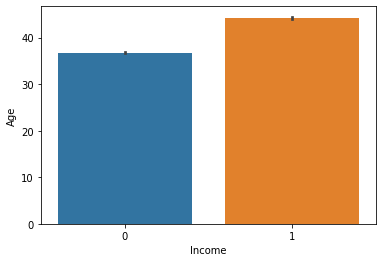

In [17]:
sns.barplot(x = 'Income', y = 'Age', data = df)

In [ ]:
sns.pairplot(df, hue = 'Income', palette = 'inferno')

In [ ]:
sns.heatmap(df.corr())